# Hernquist distribution
The aim of this notebook is to generate an unperturbed Hernquist distribution. We will then add two extra points which will simulate two black holes, to study the dynamical friction and their interaction.

The Henrquist profile is described by the follwing density distribution:

$$ \rho(r) = \frac{M}{2\pi}\frac{a}{r}\frac{1}{(r+a)^3} $$   
where $a$ is a scale radius. Note that for radii larger than $a$, the density goes as $r^{-4}$, at smaller radii it will instead go as r.

From the density distribution one can compute the mass distribution and the potential shape, assuming a spherical distribution. 

$$ M(R) = \int_0^R 4\pi r^2 \rho(r) dr  = \frac{M_{tot}R^2}{(R+a)^2}$$

$$ \phi_H (R) = -4\pi G\Bigl[\frac{1}{R} \int_0^R \rho(r) r^2 dr + \int_R^\infty \rho(r) r dr\Bigr] = - \frac{GM}{(R+a)}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

import scienceplots
plt.style.use(['science', 'no-latex'])

## Initialization

In [2]:
n = 5000 #number of particles
a = 5 #scale radius
M = n #each particle has a mass = 1 in internal units

## Position sampling
In order to create the profile, we need to sample the position and velociy of each of our n particles. To do this, we first find the radial distribution:

$$ P(R) = \frac{M(R)}{M_{tot}} = \frac{R^2}{(R + a)^2} $$

where $0 < P(R) < 1$. In this way we can sample from a uniform distribution and then convert that value into a radius:

$$ R = \frac{a\sqrt{P(R)}}{1-\sqrt{P(R)}}$$

Assuming spherical symmetry, the angular positions can instead be generated from:


$$ \Theta = \arccos{(1-2P(\Theta))}$$

$$ \Phi = {2\pi}P(\Phi)$$

where P once again is drawn from a uniform distribution.

In [3]:
def radius_from_P (P):
    return (a * np.sqrt(P)) / (1 - np.sqrt(P))

In [4]:
#samples ---------------------------------
P_R = np.random.uniform(0, 1, n)
radius = radius_from_P (P_R)
radius_s = np.sort(radius)
r_inverse = radius_s[::-1] #we will need the arr that goes from rmax to rmin later

P_theta = np.random.uniform(0, 1, n)
theta = np.arccos(1 - 2*P_theta)

P_phi = np.random.uniform(0, 1, n)
phi = 2 * np.pi * P_phi

C:\Users\lm101\AppData\Local\Temp\ipykernel_15696\4100112749.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


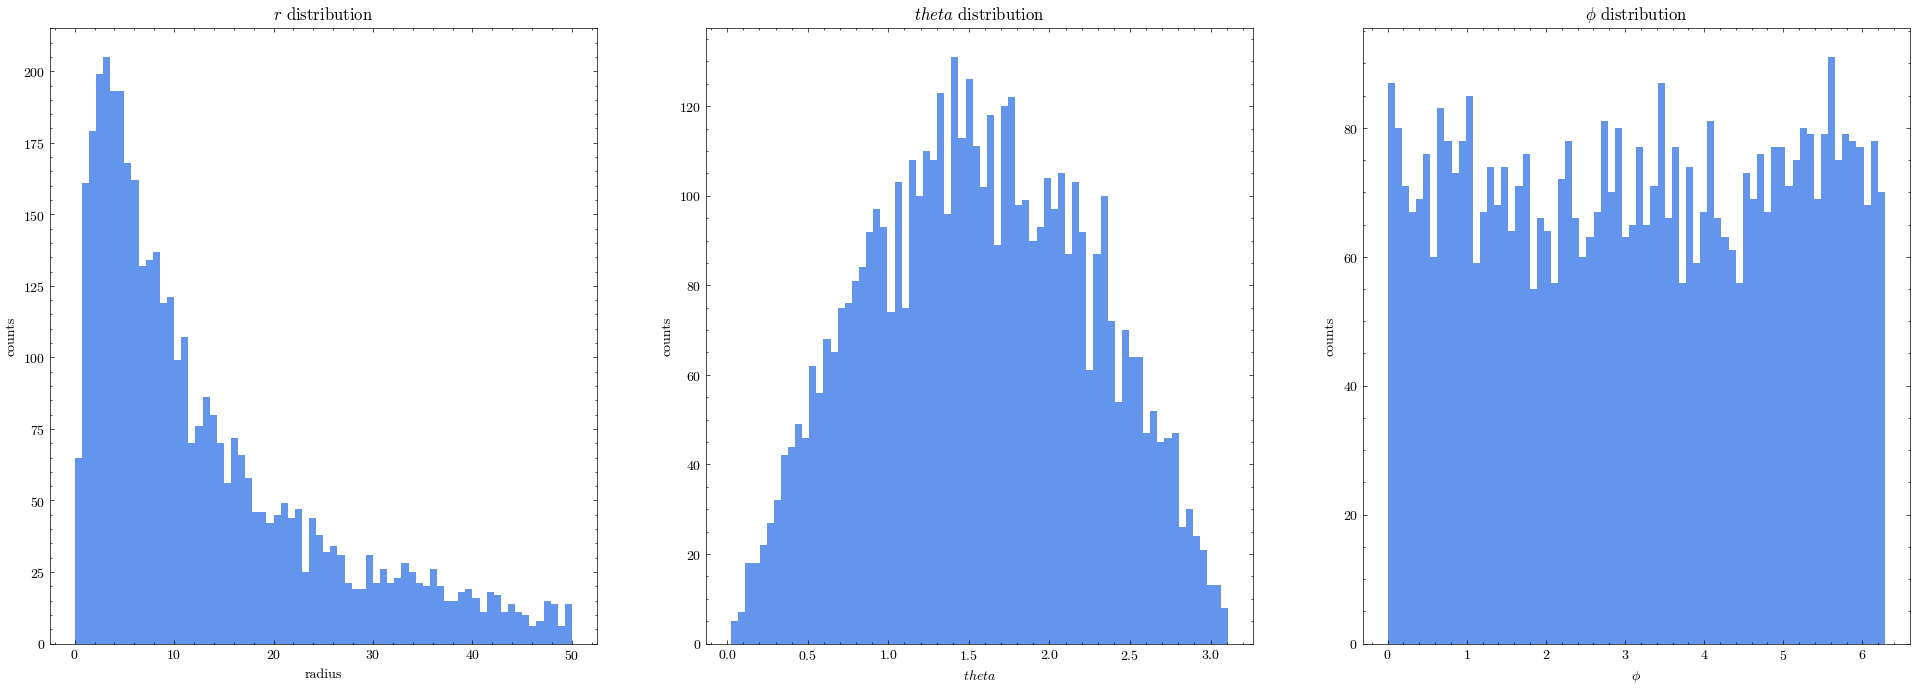

In [5]:
fig,ax = plt.subplots(ncols=3,nrows=1,figsize=(24,8))
ax[0].hist(radius_s, range=(0,50), bins = int(np.sqrt(n)), color = 'cornflowerblue')
ax[0].set(title = '$r$ distribution', ylabel = "counts", xlabel = "radius")

ax[1].hist(theta, bins = int(np.sqrt(n)), color = 'cornflowerblue')
ax[1].set(title = '$theta$ distribution', ylabel = "counts", xlabel = "$theta$")
ax[1].plot()

ax[2].hist(phi, bins = int(np.sqrt(n)), color = 'cornflowerblue')
ax[2].set(title = '$\phi$ distribution', ylabel = "counts", xlabel = "$\phi$")
ax[2].plot()

fig.show()

In [6]:
#carthesian coord conversion -----------
def sph_to_carth (radius, theta, phi):
    x = radius * np.sin(theta) * np.cos(phi)
    y = radius * np.sin(theta) * np.sin(phi)
    z = radius * np.cos(theta)
    return x, y, z

C:\Users\lm101\AppData\Local\Temp\ipykernel_15696\841453379.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


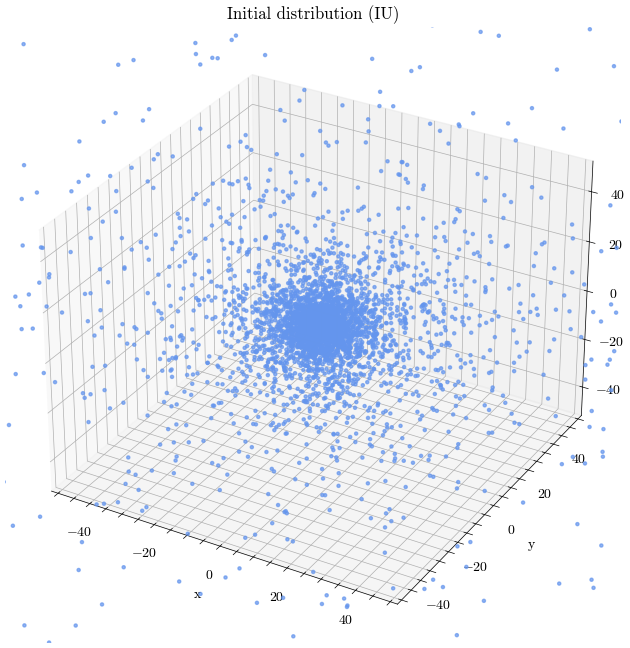

In [7]:
x, y, z = sph_to_carth(radius, theta, phi)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

ax.scatter(x,y,z,s=5,alpha=0.7, color = 'cornflowerblue')
ax.set (title = 'Initial distribution (IU)', xlabel = 'x', ylabel = 'y', zlabel = 'z', xlim = (-50,50), ylim = (-50, 50), zlim = (-50, 50))

fig.show()

## Velocity sampling
To sample our velocities, we first need to compute the distribution function $f$ through the Eddington formula:
$$ f(\varepsilon) = \frac{1}{\sqrt{8}\pi^2} \frac{d}{d\varepsilon}\int_0^{\varepsilon} \frac{d\rho}{d\psi}\frac{1}{\sqrt{\psi-\varepsilon}} d\psi$$

where $\psi = -\phi$.

The extreme of integration is different for each particle:
$$\varepsilon = \psi - \frac{v^2}{2} $$

$\varepsilon$ is between 0 and the maximum of the potential energy.

In [8]:
def compute_pot(R):
    return - M / (R + a)

def compute_rho(R):
    return M / (2* np.pi) * a/R * 1/(R+a)**3

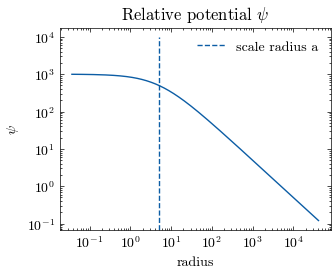

In [9]:
potential = - compute_pot (r_inverse)
#we have the potential of each particle, which also corresponds to their eps_max

plt.plot(r_inverse, potential)
plt.title("Relative potential $\psi$")
plt.ylabel("$\psi$")
plt.xlabel("radius")
plt.vlines(a, ymin = 0, ymax = 1e4, linestyle = "dashed", label = "scale radius a")
plt.legend()
plt.loglog()
plt.show()


So the relative potential seems to have to correct trend (constant when r << a, prop to $r^{-1}$ when r>> a) and it is positive. I now want to check at each value of the potential which is the maximum value of velocity $v$: if I know that $\epsilon > 0$ for a bound system and that $\epsilon = \psi + \frac{v^2}{2}$, i should be able to get velocity ranges.

$$ \frac{v^2}{2} < \psi $$
$$ -\sqrt{2\psi} < v < \sqrt{2\psi} $$

and since obviously v is a physical velocity this then becomes:

$$ 0 < v < \sqrt{2\psi} $$

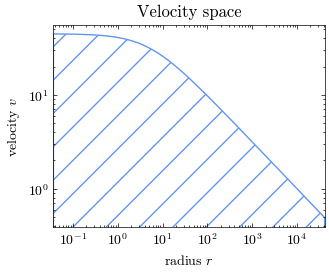

min radius =  0.036855517684804724  , max velocity =  44.557442297903094


In [10]:
max_vel = np.sqrt(2 * potential)
plt.fill_between(r_inverse, y1 = 0, y2 = max_vel, fc = "white", edgecolor = "cornflowerblue",  hatch = "/")
plt.xlim([r_inverse[n-1], r_inverse[0]])
plt.title("Velocity space")
plt.xlabel("radius $r$")
plt.ylabel("velocity $v$")
plt.loglog()
plt.show()

print("min radius = ", r_inverse[n-1],  " , max velocity = " , max_vel[n-1])

Let's plot $\epsilon$, its value at each radius will be constrained by the value of the min (0) and max velocity that we've just found.
Actually not needed, as $\epsilon$ is maximised for $v = 0$, for which $\epsilon = \psi$ and for the maximum velocity it will be null.


Since we computed the potential on the r array which goes from $r_{max}$ to $r_{min}$, the potential array is already in ascending order.

## Some comments on $\epsilon$ and the integration
We said that $\epsilon = \psi - v^2 / 2$. For our samples, we now have the potential at each radius -> what we are missing to integrate the Eddington's formula is the values of $\epsilon$ for each particle, which we obviously don't have as they require knowing the velocity. 
$$ f(\epsilon) \propto \frac{dI}{d\epsilon} $$
But knowing the definition of $\epsilon$ and knowing that it must be positive has given us a constrain on the possible values of the velocity: now $\epsilon$ has to run between 0 (when the velocity is maximum and equal to $\sqrt{2\psi}$)  and the potential $\psi$ of the radius we've evaluating. Basically, we first choose one value of epsilon, this will then correspond not to a single radius, but to an array of them, given by the condition:
$$0 < r < r (\psi = \epsilon)$$

At $r = 0$ $v = \sqrt{\psi - \epsilon}$,  while at $r (\psi = \epsilon)$, $v = 0$.

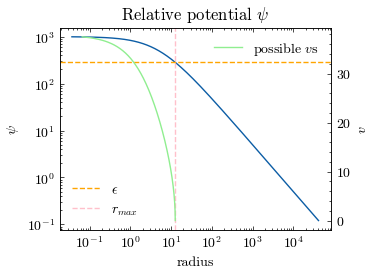

In [11]:
fig, ax1 = plt.subplots()

ex= int(n/2)
eps_ex = potential[ex]
ax2 = ax1.twinx()
ax1.loglog()
ax2.semilogx()
ax1.plot(r_inverse, potential)
ax1.set(title = "Relative potential $\psi$", ylabel = "$\psi$", xlabel = "radius")
ax1.axhline(eps_ex, linestyle = "dashed", c = "orange", label = "$\epsilon$")
ax1.axvline(r_inverse[ex],  linestyle = "dashed", c = "pink", label = "$r_{max}$")

ax2.plot(r_inverse[ex:(n-1)], np.sqrt(2 * (potential[ex:(n-1)] - eps_ex)), color = 'lightgreen',label = 'possible $v$s')
ax2.set_ylabel("$v$")

ax1.legend()
ax2.legend()
plt.show()

So we will need to compute the integral for each value of $\epsilon$, for which the relative potential runs from $\psi(r_{max})$ to $\psi(r = 0)$.

In [33]:
eps = potential 
integral = np.zeros(n)
n_points = 100
alpha = 0.9999999999999 #or else we are dividing by zero in the integral
for i in range(n-2):
    r = np.linspace(r_inverse[i+1], r_inverse[n-1], n_points)
    psi = - compute_pot(r)
    rho = compute_rho(r)
    drho_dpsi = np.gradient(rho) / np.gradient(psi)
    for j in range(n_points):
        if psi[j] - eps[i] == 0: print("errore integrale", i, j)
        if np.gradient(psi)[j] == 0: print("errore gradiente", i, psi[j])
            
    integral[i] = np.sum (drho_dpsi *( 1/np.sqrt(psi - alpha * eps[i])))

In [34]:
print(integral)

[2.67023455e-01 1.50624990e-01 1.49657499e-01 ... 2.12113593e+03
 0.00000000e+00 0.00000000e+00]


Text(0.5, 1.0, 'Numerical integral')

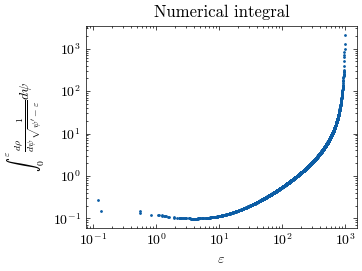

In [35]:
fig = plt.figure()

plt.scatter(eps[0:n-2],integral[0:n-2], s = 1)
plt.loglog()
plt.xlabel(r'$\varepsilon$')
plt.ylabel(r"$\int_0^{\varepsilon} \frac{d\rho}{d\psi}\frac{1}{\sqrt{\psi'-\varepsilon}} d\psi$")

plt.title('Numerical integral')